# Apply ML algorithms

Decision Tree Regressor

In [28]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = pd.read_csv("G:\\KHULNA DATA CSV\\New Data\\CombineKhulnaDataset.csv")

In [30]:
data.head()

D      T    TM     Tm      SLP      H    VV     V    VM    AQI Category
0  1-Jan  21.00  25.5  18.00  1010.90  77.00  5.10  0.00  4.13  346.0       EU
1      2  18.60  22.5  16.00  1011.70  85.00  5.00  0.00  4.13   39.0        G
2      3  17.40  23.2  13.50  1012.70  72.00  4.80  1.70  7.60  346.0       EU
3      4  17.54  24.0  12.54  1012.67  76.27  4.39  0.51  4.13  396.0       EU
4      5  17.54  24.0  12.54  1012.67  76.27  4.39  0.51  4.13  372.0       EU

In [31]:
data.shape

(1007, 11)

In [32]:
data = data.drop(['D'], axis = 1)
data

T     TM     Tm      SLP      H    VV     V    VM    AQI Category
0     21.00  25.50  18.00  1010.90  77.00  5.10  0.00  4.13  346.0       EU
1     18.60  22.50  16.00  1011.70  85.00  5.00  0.00  4.13   39.0        G
2     17.40  23.20  13.50  1012.70  72.00  4.80  1.70  7.60  346.0       EU
3     17.54  24.00  12.54  1012.67  76.27  4.39  0.51  4.13  396.0       EU
4     17.54  24.00  12.54  1012.67  76.27  4.39  0.51  4.13  372.0       EU
...     ...    ...    ...      ...    ...   ...   ...   ...    ...      ...
1002  17.00  25.00  11.00  1013.70  68.00  4.70  0.00  3.50  277.0       VU
1003  19.71  26.27  14.30  1014.52  75.62  4.46  0.02  3.50  308.0       EU
1004  19.71  26.27  14.30  1014.52  75.62  4.46  0.02  3.50  275.0       VU
1005  19.71  26.27  14.30  1014.52  75.62  4.46  0.02  3.50  234.0       VU
1006  17.90  25.70  11.60  1015.40  71.00  4.50  0.00  3.50  249.0       VU

[1007 rows x 10 columns]

In [33]:
data.isnull().sum()

T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

<AxesSubplot:>

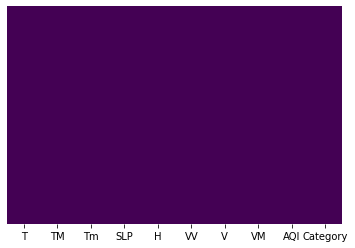

In [34]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Categorical Value Handling - (Label Encoding Method)

In [35]:
data['Category'].unique()

array(['EU', 'G', 'VU', 'U', 'C', 'M'], dtype=object)

# Import Label Encoder


In [36]:
from sklearn import preprocessing 

In [37]:
encode = preprocessing.LabelEncoder()
data['Category'] = encode.fit_transform(data['Category'])

In [38]:
data['Category'].unique()

array([1, 2, 5, 4, 0, 3])

In [39]:
data.head()

T    TM     Tm      SLP      H    VV     V    VM    AQI  Category
0  21.00  25.5  18.00  1010.90  77.00  5.10  0.00  4.13  346.0         1
1  18.60  22.5  16.00  1011.70  85.00  5.00  0.00  4.13   39.0         2
2  17.40  23.2  13.50  1012.70  72.00  4.80  1.70  7.60  346.0         1
3  17.54  24.0  12.54  1012.67  76.27  4.39  0.51  4.13  396.0         1
4  17.54  24.0  12.54  1012.67  76.27  4.39  0.51  4.13  372.0         1

# Correalation Matrix

In [40]:
data.corr()

T        TM        Tm       SLP         H        VV  \
T         1.000000  0.945659  0.966267 -0.822265  0.196302  0.922334   
TM        0.945659  1.000000  0.861041 -0.713858 -0.013926  0.892829   
Tm        0.966267  0.861041  1.000000 -0.863422  0.406262  0.890910   
SLP      -0.822265 -0.713858 -0.863422  1.000000 -0.426451 -0.769661   
H         0.196302 -0.013926  0.406262 -0.426451  1.000000  0.143313   
VV        0.922334  0.892829  0.890910 -0.769661  0.143313  1.000000   
V         0.436250  0.335693  0.457014 -0.556918  0.195565  0.387312   
VM        0.184945  0.121032  0.211589 -0.216728  0.168926  0.176431   
AQI      -0.848419 -0.752190 -0.869776  0.737532 -0.354213 -0.806703   
Category -0.354369 -0.330544 -0.336501  0.351633 -0.006072 -0.339780   

                 V        VM       AQI  Category  
T         0.436250  0.184945 -0.848419 -0.354369  
TM        0.335693  0.121032 -0.752190 -0.330544  
Tm        0.457014  0.211589 -0.869776 -0.336501  
SLP      -0.556918 -0.216728  0.737532  0.351633  
H         0.195565  0.168926 -0.354213 -0.006072  
VV        0.387312  0.176431 -0.806703 -0.339780  
V         1.000000  0.595583 -0.460642 -0.203019  
VM        0.595583  1.000000 -0.205455 -0.161174  
AQI      -0.460642 -0.205455  1.000000  0.264407  
Category -0.203019 -0.161174  0.264407  1.000000

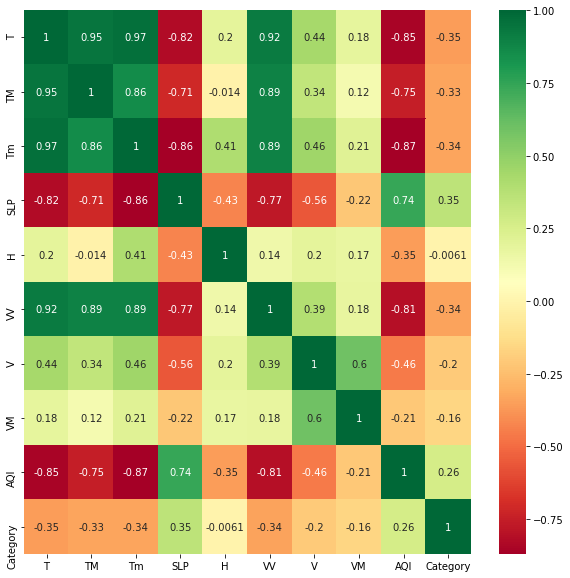

In [41]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
X = data.iloc[:,:-2] ##independent features
y = data.iloc[:,-2]  ##dependent features

In [43]:
X.head()

T    TM     Tm      SLP      H    VV     V    VM
0  21.00  25.5  18.00  1010.90  77.00  5.10  0.00  4.13
1  18.60  22.5  16.00  1011.70  85.00  5.00  0.00  4.13
2  17.40  23.2  13.50  1012.70  72.00  4.80  1.70  7.60
3  17.54  24.0  12.54  1012.67  76.27  4.39  0.51  4.13
4  17.54  24.0  12.54  1012.67  76.27  4.39  0.51  4.13

In [44]:
y.head()

0    346.0
1     39.0
2    346.0
3    396.0
4    372.0
Name: AQI, dtype: float64

In [45]:
y.isnull().sum()

0

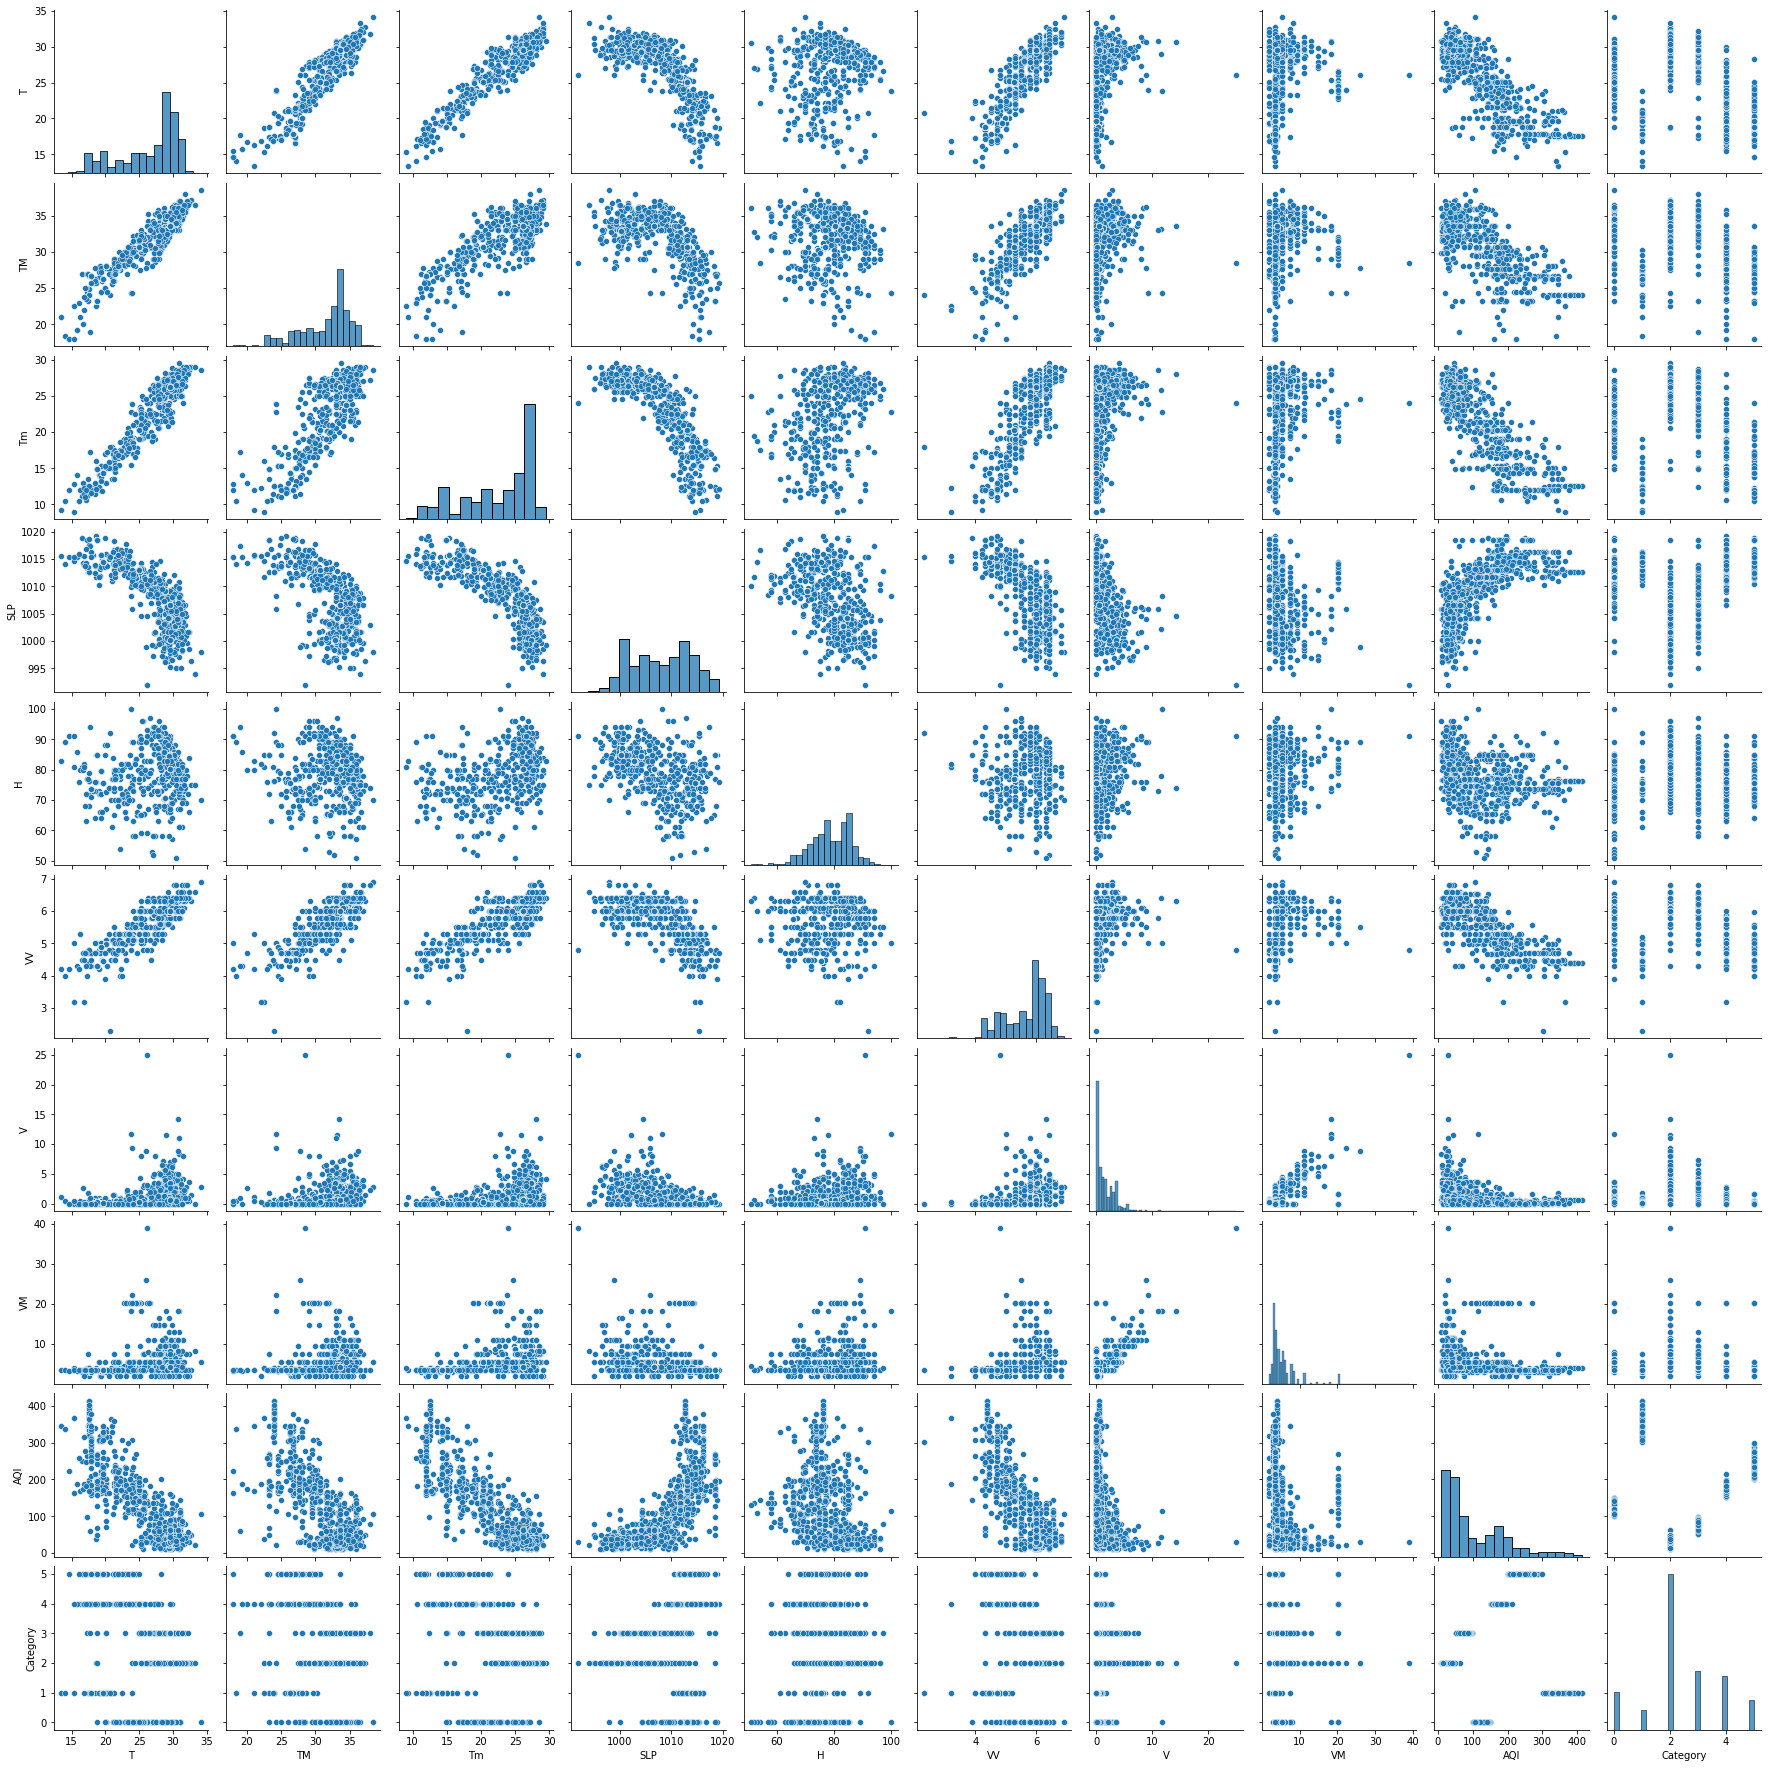

In [46]:
sns.pairplot(data)

# Feature Importance

We are using Extra Tree Regressor to find out top features from dataset.

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

In [48]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [49]:
print(model.feature_importances_)

[0.25768634 0.08639846 0.35629663 0.11329178 0.02445104 0.1225147
 0.01899157 0.02036948]


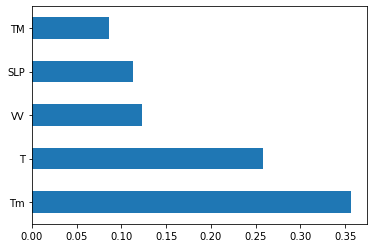

In [50]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

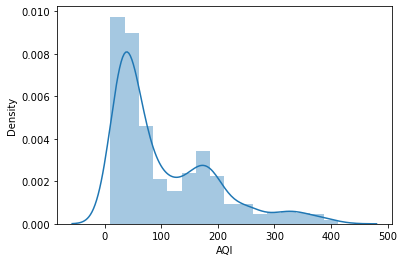

In [51]:
sns.distplot(y,kde=True)

# Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Type Markdown and LaTeX:  𝛼2

# M-4: Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dtree=DecisionTreeRegressor(criterion='mse')

In [56]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
round(dtree.score(X_train,y_train)*100,2)

92.57

In [58]:
round(dtree.score(X_test,y_test)*100,2)

74.66

In [59]:
# Cross Validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree,X_train,y_train,cv=5)
round(score.mean()*100,2)

80.67

# Tree Visualization

In [63]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [64]:
features = list(data.columns[:-2])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [65]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

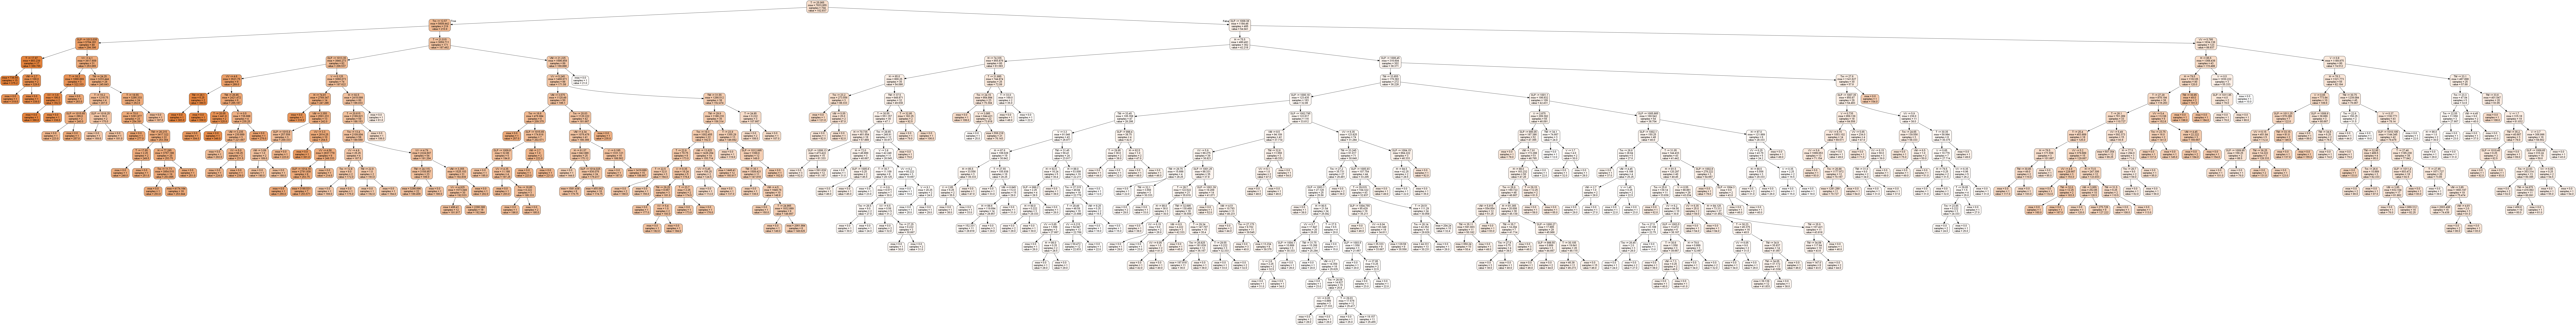

In [66]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Model Evaluation

In [67]:
from sklearn import metrics
prediction=dtree.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

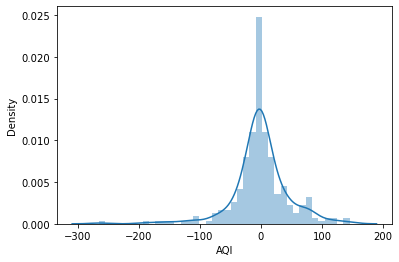

In [68]:
sns.distplot(y_test-prediction,kde=True)

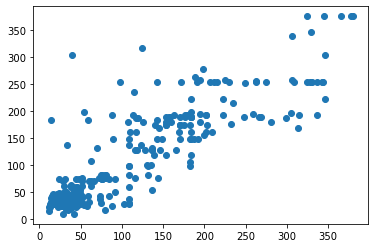

In [69]:
plt.scatter(y_test,prediction)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 29.03718070982922
MSE: 2121.998222554195
RMSE: 46.06515193239022


# Hyperparameter Tuning

In [71]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [72]:
#Hyper Parameter Optimization

params={   
    "splitter" : ["best","random"],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_samples_leaf" : [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features" : ["auto", "log2", "sqrt", None],
    "max_leaf_nodes" : [None, 10, 20, 30, 40, 50, 60, 70] 
}

In [73]:
#Hyparparameter optimization

from sklearn.model_selection import GridSearchCV

In [74]:
search=GridSearchCV(dtree,param_grid=params,scoring='r2',n_jobs=-1,cv=10,verbose=3)

In [75]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [76]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 12800 candidates, totalling 128000 fits

 Time taken: 0 hours 5 minutes and 2.07 seconds.


In [77]:
search.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [78]:
round(search.best_score_*100,2)

75.93

# Model Evaluation

In [79]:
predictions=search.predict(X_test)

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31.425405192034358
MSE: 2144.161217596522
RMSE: 46.30508846332681
